In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 

In [61]:
warnings.filterwarnings('ignore') 
gaze = pd.read_csv("../eye_tracking_expiriment\data\gaze_data3.csv")
gaze.head(10)

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_x,left_gaze_origin_in_user_y,left_gaze_origin_in_user_z,right_gaze_origin_in_user_x,right_gaze_origin_in_user_y,right_gaze_origin_in_user_z,left_gaze_origin_in_trackbox_x,...,left_pupil_diameter,right_pupil_diameter,Reading,text_file,passage_index,font_size,font_name,Author,AI,Label
0,0.273652,1,1,-47.053429,-1.724839,759.094604,13.891398,-5.066738,760.702026,0.588534,...,2.834351,2.656281,True,AI_HC_P01_text.txt,1.0,20.0,Times New Roman,HC,False,Immersive
1,0.284210,1,1,-47.057667,-1.489308,758.620483,13.907504,-4.929574,760.303162,0.588593,...,2.786285,2.689331,True,AI_HC_P01_text.txt,1.0,20.0,Times New Roman,HC,False,Immersive
2,0.295114,1,1,-47.057667,-1.489308,758.620483,13.911610,-4.740332,759.630066,0.588593,...,2.786285,2.695328,True,AI_HC_P01_text.txt,1.0,20.0,Times New Roman,HC,False,Immersive
3,0.306039,1,1,-47.014763,-1.009526,757.168823,13.959146,-4.483317,758.642700,0.588675,...,2.782333,2.684448,True,AI_HC_P01_text.txt,1.0,20.0,Times New Roman,HC,False,Immersive
4,0.317681,1,1,-46.983860,-0.979828,756.679871,13.983862,-4.462842,758.221924,0.588673,...,2.799469,2.665207,True,AI_HC_P01_text.txt,1.0,20.0,Times New Roman,HC,False,Immersive
5,0.328695,1,1,-46.983860,-0.979828,756.679871,14.017673,-4.522894,757.598328,0.588673,...,2.799469,2.657349,True,AI_HC_P01_text.txt,1.0,20.0,Times New Roman,HC,False,Immersive
6,0.339540,1,1,-46.897335,-1.263764,754.982422,14.049044,-4.667477,756.496460,0.588714,...,2.785889,2.665314,True,AI_HC_P01_text.txt,1.0,20.0,Times New Roman,HC,False,Immersive
7,0.350899,1,1,-46.868584,-1.383467,754.282776,14.054731,-4.738054,755.894714,0.588743,...,2.775665,2.654861,True,AI_HC_P01_text.txt,1.0,20.0,Times New Roman,HC,False,Immersive
8,0.362168,1,1,-46.868584,-1.383467,754.282776,14.066855,-4.844875,755.254028,0.588743,...,2.775665,2.635483,True,AI_HC_P01_text.txt,1.0,20.0,Times New Roman,HC,False,Immersive
9,0.373093,1,1,-46.705441,-1.766138,752.854492,14.126526,-5.051890,754.296997,0.588608,...,2.780960,2.616455,True,AI_HC_P01_text.txt,1.0,20.0,Times New Roman,HC,False,Immersive


In [62]:
gaze.shape

(157476, 39)

In [63]:
un = gaze["text_file"].unique()
un

array(['AI_HC_P01_text.txt', 'AI_HC_P01_MCQ.txt', 'AI_HC_P01_FIBQ.txt',
       'OR_HC_P01_text.txt', 'OR_HC_P01_MCQ.txt', 'OR_HC_P01_FIBQ.txt',
       'AI_SK_P01_text.txt', 'AI_SK_P01_MCQ.txt', 'AI_SK_P01_FIBQ.txt',
       'OR_SK_P01_text.txt', 'OR_SK_P01_MCQ.txt', 'OR_SK_P01_FIBQ.txt',
       'AI_KB_P01_text.txt', 'AI_KB_P01_MCQ.txt', 'AI_KB_P01_FIBQ.txt',
       'OR_KB_P01_text.txt', 'OR_KB_P01_MCQ.txt', 'OR_KB_P01_FIBQ.txt',
       nan], dtype=object)

In [64]:
im_HC_AI = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[0])]
im_HC_OR = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[3])]
im_SK_AI = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[6])]
im_SK_OR = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[9])]
im_KB_AI = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[12])]
im_KB_OR = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[15])]
im_HC_AI.reset_index(drop=True, inplace=True) 
im_HC_OR.reset_index(drop=True, inplace=True) 
im_SK_AI.reset_index(drop=True, inplace=True) 
im_SK_OR.reset_index(drop=True, inplace=True) 
im_KB_AI.reset_index(drop=True, inplace=True) 
im_KB_OR.reset_index(drop=True, inplace=True) 
im_HC_AI["device_time_stamp"] = im_HC_AI["device_time_stamp"] - im_HC_AI["device_time_stamp"][0]
im_HC_OR["device_time_stamp"] = im_HC_OR["device_time_stamp"] - im_HC_OR["device_time_stamp"][0]
im_SK_AI["device_time_stamp"] = im_SK_AI["device_time_stamp"] - im_SK_AI["device_time_stamp"][0]
im_SK_OR["device_time_stamp"] = im_SK_OR["device_time_stamp"] - im_SK_OR["device_time_stamp"][0]
im_KB_AI["device_time_stamp"] = im_KB_AI["device_time_stamp"] - im_KB_AI["device_time_stamp"][0]
im_KB_OR["device_time_stamp"] = im_KB_OR["device_time_stamp"] - im_KB_OR["device_time_stamp"][0]
im_SK_OR.head(5)

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_x,left_gaze_origin_in_user_y,left_gaze_origin_in_user_z,right_gaze_origin_in_user_x,right_gaze_origin_in_user_y,right_gaze_origin_in_user_z,left_gaze_origin_in_trackbox_x,...,left_pupil_diameter,right_pupil_diameter,Reading,text_file,passage_index,font_size,font_name,Author,AI,Label
0,0.000000,1,1,-66.912476,20.208059,605.498840,-8.554403,18.461880,609.113647,0.657498,...,2.473312,2.389786,True,OR_SK_P01_text.txt,1.0,20.0,Times New Roman,SK,False,Immersive
1,0.011947,1,1,-66.910591,20.255175,605.355347,-8.565323,18.525028,608.955017,0.657530,...,2.464035,2.391098,True,OR_SK_P01_text.txt,1.0,20.0,Times New Roman,SK,False,Immersive
2,0.023052,1,1,-66.881462,20.332417,605.081970,-8.571023,18.596027,608.696411,0.657530,...,2.454910,2.376282,True,OR_SK_P01_text.txt,1.0,20.0,Times New Roman,SK,False,Immersive
3,0.033903,1,1,-66.876106,20.489834,604.875793,-8.588771,18.753275,608.491333,0.657568,...,2.456573,2.370758,True,OR_SK_P01_text.txt,1.0,20.0,Times New Roman,SK,False,Immersive
4,0.045018,1,1,-66.872940,20.565914,604.825928,-8.600628,18.836678,608.438416,0.657572,...,2.459991,2.366882,True,OR_SK_P01_text.txt,1.0,20.0,Times New Roman,SK,False,Immersive


In [65]:
left_x = im_SK_OR['left_gaze_point_on_display_area_x']*2560
left_y = im_SK_OR['left_gaze_point_on_display_area_y']*1440
right_x = im_SK_OR['right_gaze_point_on_display_area_x']*2560
right_y = im_SK_OR['right_gaze_point_on_display_area_y']*1440
t = im_SK_OR['device_time_stamp']
eyes = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y}).dropna()
eyes

,t,x_right,x_left,y_right,y_left
0,0.000000,1064.043274,1108.582687,528.732662,527.021713
1,0.011947,1065.795670,1112.198105,527.676902,523.170319
2,0.023052,1065.432281,1118.432388,515.370584,521.454649
3,0.033903,1065.758438,1119.915466,513.555222,525.622716
4,0.045018,1068.568878,1119.928131,515.494437,520.200362
...,...,...,...,...,...
13592,150.917193,880.912170,911.099396,1197.704945,1195.694704
13593,150.927476,886.882935,907.729492,1200.064516,1194.027100
13594,150.938827,886.772461,911.287918,1201.264000,1194.805412
13595,150.950376,888.098450,911.782837,1202.478161,1192.956533


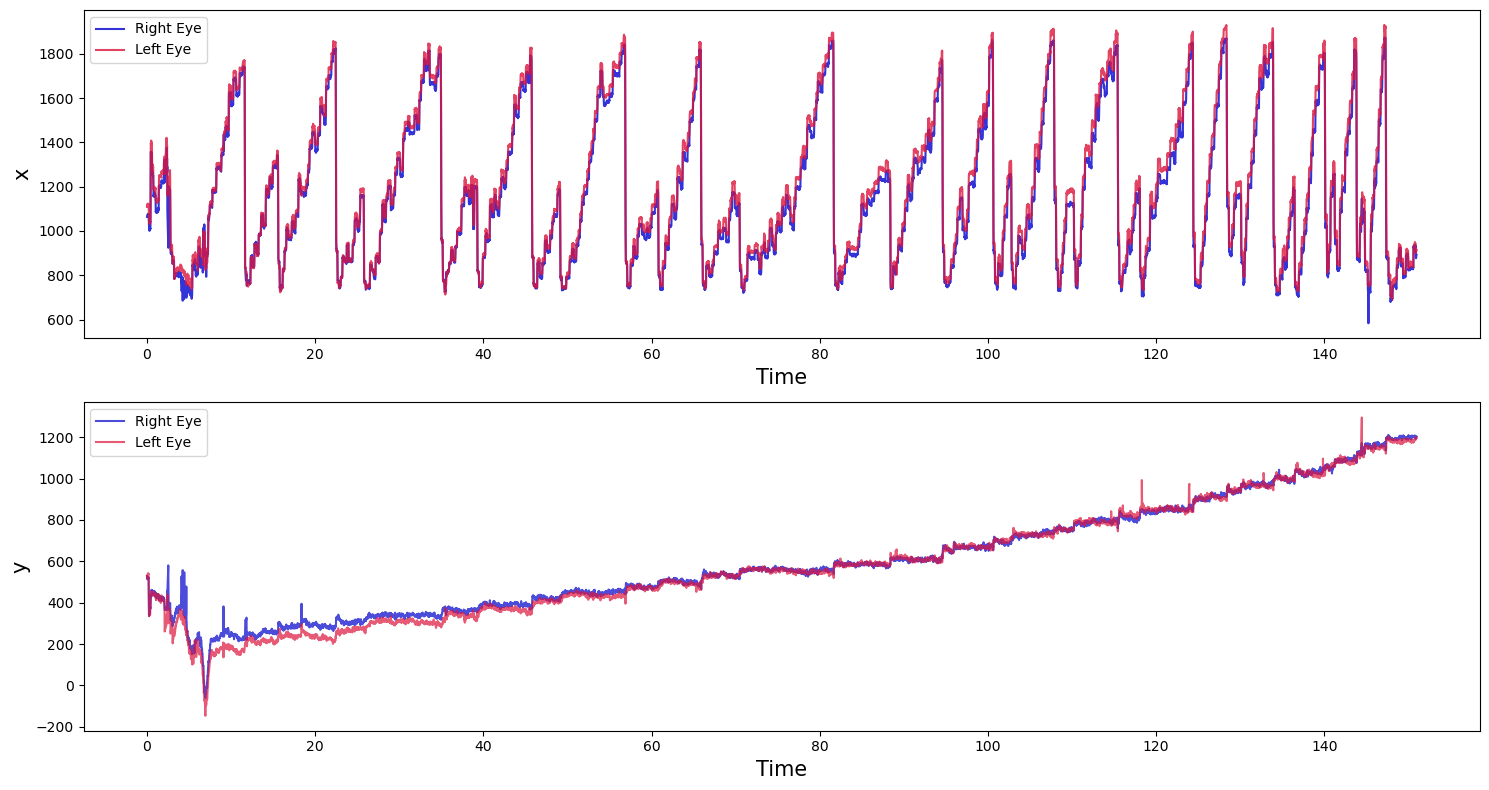

In [66]:
f, axes = plt.subplots(2, 1, figsize=(15, 8))

axes[0].plot(eyes['t'], eyes['x_right'], c='mediumblue', alpha=0.8, label='Right Eye')
axes[0].plot(eyes['t'], eyes['x_left'], c='crimson', alpha=0.8, label='Left Eye')
axes[0].set_ylabel('x', fontsize=15)


axes[1].plot(eyes['t'], eyes['y_right'], c='mediumblue', alpha=0.7, label='Right Eye')
axes[1].plot(eyes['t'], eyes['y_left'], c='crimson', alpha=0.7, label='Left Eye')
axes[1].set_ylabel('y', fontsize=15)
    
for ax in axes:
    ax.set_xlabel('Time', fontsize=15)
    ax.legend()
plt.tight_layout()
plt.show()

In [115]:
last = gaze["Label"][0]
changes = []
index = 0

for i in gaze:
   
    if last != i:
        changes = changes.append(index)
    last = i
    index = index+1
changes

AttributeError: 'NoneType' object has no attribute 'append'